# Chapter 3 Classification

MINIST Dataset 
    
   - from sklearn.datasets import fetch_openml
   
SGD 

## MNIST
 
MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐sus Bureau. Each image is labeled with the digit it represents. 

In [1]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
sklearn.__version__ >='0.2'

True

### Import MNIST Dataset

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, includ‐ing the following: 

• A DESCR key describing the dataset 

• A data key containing an array with one row per instance and one column per feature 

• A target key containing an array with the labels

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

70,000 images, and each image has 784 features. 

This is because each image is 28 × 28 pixels, each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

In [9]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28,28)

In [10]:
some_digit.dtype

dtype('float64')

In [11]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
some_digit_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

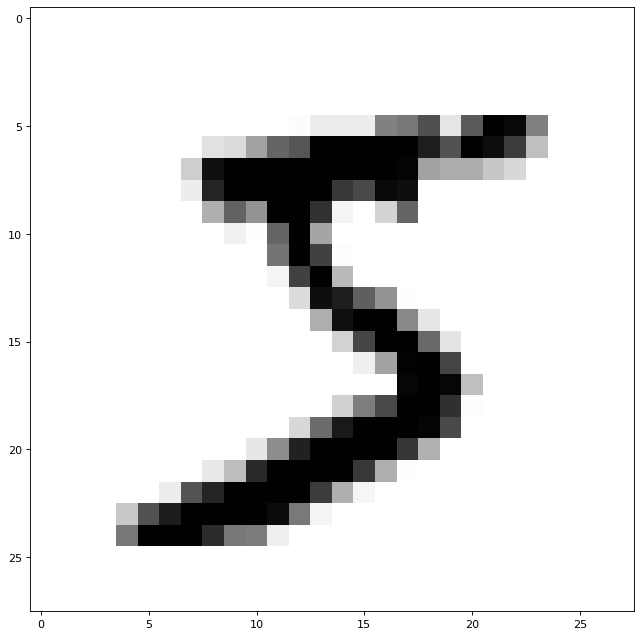

The label tells us it is 5


In [13]:
_, ax = plt.subplots(figsize=(10,10),dpi=80)
plt.imshow(some_digit_img, cmap=mpl.cm.binary)
plt.show()
print(f'The label tells us it is {y[0]}')

In [14]:
# plot first 100 omages from mnist
def plt_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,
              interpolation="nearest")
    plt.axis("off")

In [15]:
# def plot_digits(instances, images_per_row=10,**options):
#     size=28
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size) for instance in instances]
#     n_rows = (len(instances)-1)//images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(###### see， you jumped the lines.....#### np.concatenate(rimages, axis=1))

In [16]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))

    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

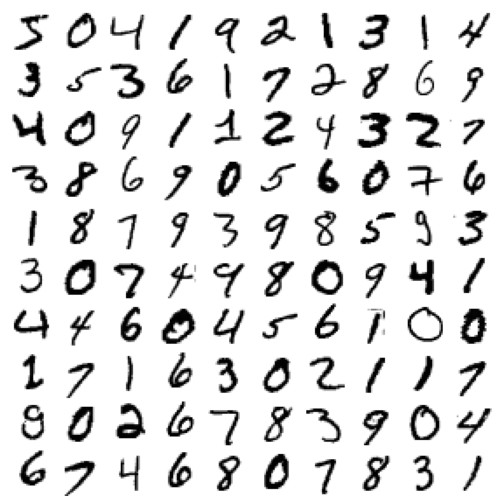

In [17]:
plt.figure(figsize=(9,9))

example_images = X[:100]
plot_digits(example_images,images_per_row=10)
plt.show()

In [18]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
# Cast y to integer:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

### Binary Classifier (SGD)

Training a Binary Classifier with Stochastic Gradient Descent classifier.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=42)

In [22]:
X_train.shape, y_test.shape

((63000, 784), (7000,))

In [23]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [25]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True)

Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

#### Cross validation

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clone_clf = clone(sgd_clf)

In [28]:
for train_index, test_index in skfolds.split(X_train, y_train_5):

    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9631904761904762
0.9658095238095238
0.955047619047619


use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96914286, 0.96366667, 0.96319048])

dumb classifier that just classifies every single image in the “not-5” class

In [31]:
from sklearn.base import BaseEstimator

In [32]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self,X,):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

In [33]:
cross_val_score(never_5_clf, X_train, y_train_5,cv=3,scoring="accuracy")

array([0.91019048, 0.90952381, 0.911     ])

#### Confusion Matrix

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train_5,y_train_pred)

array([[56326,  1019],
       [ 1165,  4490]])

In [38]:
# Pretending we reach the perfection
perfect_y_train_predictions = y_train_5
confusion_matrix(y_train_5, perfect_y_train_predictions)

array([[57345,     0],
       [    0,  5655]])

#### Precision and Recall

In [150]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [151]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[56326,  1019],
       [ 1165,  4490]])

|          | Predicted 1 | Predicted2 |
| -------- | ----------- | ---------- |
| Actual 1 | $TN$        | $FP$       |
| Actual 2 | $FN$        | $TP$       |

$$
\mathop{Precision} = \frac{TP}{TP+FP}\\
\mathop{Recall} = \frac{TP}{TP+FN}\\
\mathop{F_1} = \frac{2 * Recall * Precision}{Recall + Precision}\\
= \frac{2TP}{2TP + FP + FN} = \frac{TP}{TP + \frac{FP + FN}{2}}
$$

In [41]:
cm_precision = cm[1,1] / (cm[0,1] + cm[1,1])
cm_precision

0.8150299509892902

In [42]:
precision_score(y_train_5,y_train_pred)

0.8150299509892902

In [43]:
cm_recall = cm[1,1] / (cm[1,0] + cm[1,1])
cm_recall

0.7939876215738285

In [44]:
recall_score(y_train_5, y_train_pred)

0.7939876215738285

In [45]:
cm_f1 = 2 * cm_recall * cm_precision /(cm_recall + cm_precision)
cm_f1

0.8043711931207451

In [46]:
f1_score(y_train_5,y_train_pred)

0.8043711931207451

#### Precision/Recall Trade off

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:

In [47]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1576.28497174])

In [48]:
threshold = 0

In [49]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [50]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### How to find the threshold?

How do you decide which threshold to use? First, use the `cross_val_predict()` function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [59]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_5,
                             cv=3,
                             method="decision_function")

In [60]:
from sklearn.metrics import precision_recall_curve

In [62]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [98]:
precisions[:-1],recalls[:-1],thresholds[:-1]

(array([0.08986889, 0.08985443, 0.08985586, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99823165e-01, 9.99823165e-01, ...,
        5.30503979e-04, 3.53669319e-04, 1.76834660e-04]),
 array([-69053.9010874 , -68794.481319  , -68726.92214886, ...,
         27907.11124297,  27973.32127163,  29401.46811377]))

In [100]:
recall_90_precision = recalls[np.argmax(precisions >= 0.9)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [101]:
recall_90_precision

0.6824049513704686

In [102]:
threshold_90_precision

1717.8683352472922

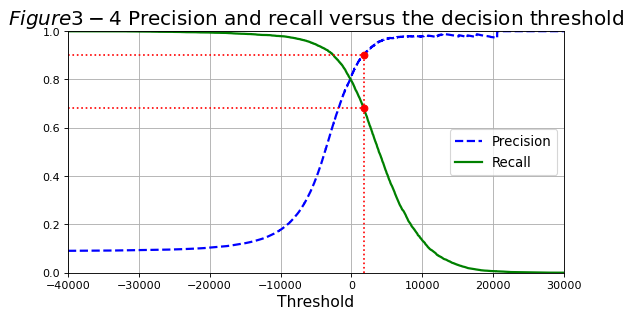

In [118]:
_, ax = plt.subplots(figsize=(8, 4), dpi=80)
#Plot the precision and recall curve
ax.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
ax.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
ax.legend(loc="center right", fontsize=12)
ax.grid(True)
ax.axis([-40000, 30000, 0, 1])
plt.xlabel("Threshold", fontsize=14)
# Plot threshold_90_precision and recall_90_precision
ax.plot([threshold_90_precision,threshold_90_precision],[0,0.9],"r:")
ax.plot([-40000,threshold_90_precision],[0.9,0.9],"r:")
ax.plot([-40000, threshold_90_precision], [recall_90_precision,recall_90_precision], "r:")
ax.plot([threshold_90_precision],[0.9],"ro")
ax.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.title("$Figure 3-4.$ Precision and recall versus the decision threshold",fontsize=18)
plt.show()

plot precision directly against recall to select a good precision/recall trade-off`

In [123]:
(y_train_pred == (y_scores > 0)).all()

True

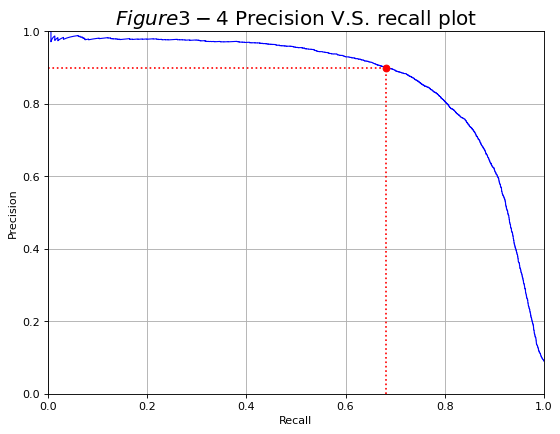

In [137]:
_, ax = plt.subplots(figsize=(8,6),dpi=80)

ax.plot(recalls,precisions,"b-",linewidth=1)
ax.set(xlabel="Recall",ylabel="Precision")
ax.plot([recall_90_precision,recall_90_precision],[0,0.9],"r:")
ax.plot([0, recall_90_precision],[0.9,0.9],"r:")
ax.plot([recall_90_precision], [0.9], "ro")
ax.axis([0,1,0,1])
ax.grid(True)
plt.title("$Figure 3-4.$ Precision V.S. recall plot", fontsize=18)
plt.show()


In [139]:
threshold_90_precision

1717.8683352472922

In [140]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [152]:
precision_score(y_train_5, y_train_pred_90)

0.900163284348029

In [153]:
recall_score(y_train_5, y_train_pred_90)

0.6824049513704686

### ROC Curves

The $\textit{receiver operating characteristic}$ (ROC) curve is another common tool used with binary classifiers. 

The ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR):

- The ratio of negative instances that are incorrectly classified as positive.
- Equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative.The TNR is also called specificity.

Hence, the ROC curve plots sensitivity (recall) versus 1 specificity.

In [154]:
from sklearn.metrics import roc_curve

In [166]:
fpr, tpr,thresholds = roc_curve(y_train_5, y_scores)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

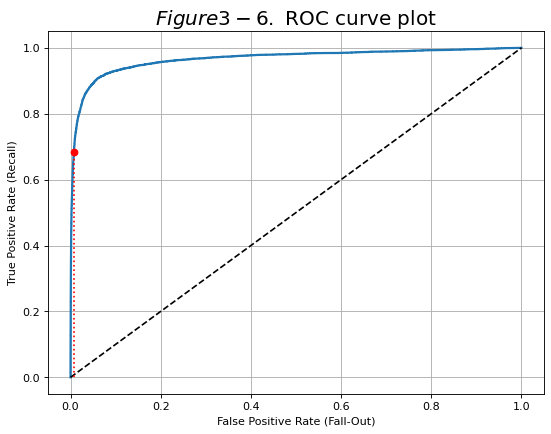

In [170]:
_,ax = plt.subplots(figsize=(8,6),dpi=80)

ax.plot(fpr, tpr,linewidth=2)
ax.plot([0,1],[0,1],'k--') # dashed diagonal
ax.plot([fpr_90,fpr_90],[0, recall_90_precision],"r:") # vertical line for 90
ax.plot([0, fpr_90], [recall_90_precision,recall_90_precision],"r:") # horizontal line for 90 but almost not visible
ax.plot([fpr_90],[recall_90_precision],"ro")

ax.grid(True)
ax.set(xlabel='False Positive Rate (Fall-Out)',
       ylabel='True Positive Rate (Recall)')
plt.title("$Figure 3-6. $ ROC curve plot", fontsize=18)
plt.show()

Compare classifiers by measuring area under the curve (AUC).

In [173]:
from sklearn.metrics import roc_auc_score

In [175]:
roc_auc_score(y_train_5,y_scores)

0.9666531801136327

### Train a RandomForestClassifier and compare with SGD

Train a RandomForestClassifier and compare with its ROC curve and ROC AUC score to those of the SGDClassifier.

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
# n_estimators= 100
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_prob_forest = cross_val_predict(forest_clf,X_train,y_train_5,
                                                            cv=3,method="predict_proba")

In [184]:
y_prob_forest[:,1]

array([0.16, 0.  , 0.11, ..., 0.02, 0.  , 0.03])

In [185]:
y_scores_forest = y_prob_forest[:,1] # score = proba of positive class
fpr_forest,tpr_forest, threshold_forest =roc_curve(y_train_5,y_scores_forest)
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= 90)]

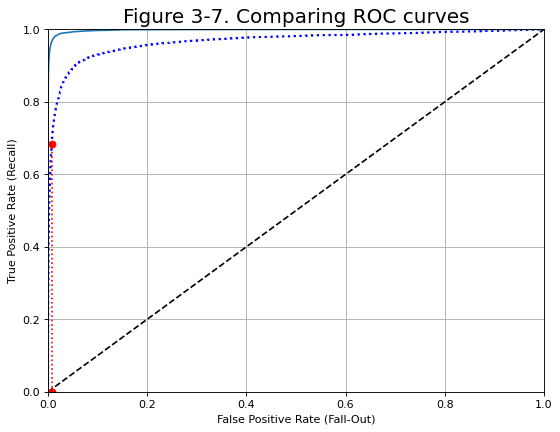

In [192]:
_, ax =plt.subplots(figsize=(8,6),dpi=80)

ax.plot(fpr,tpr,"b:",linewidth=2,label="SGD")
ax.plot(fpr_forest,tpr_forest,label="RandomForest")
ax.plot([0, 1], [0, 1], 'k--') # dashed diagonal
ax.axis([0, 1, 0, 1])

ax.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
ax.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
ax.plot([fpr_90], [recall_90_precision], "ro")
ax.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
ax.plot([fpr_90], [recall_for_forest], "ro")


ax.set(xlabel='False Positive Rate (Fall-Out)',
       ylabel='True Positive Rate (Recall)')
plt.title("Figure 3-7. Comparing ROC curves",fontsize=18)
ax.grid(True)


the Random Forest classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC

In [194]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983888557005896

In [195]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)

In [198]:
precision_score(y_train_5,y_train_pred_forest)

0.9905584572117316

In [199]:
recall_score(y_train_5,y_train_pred_forest)

0.8719717064544651

## Multicalss classification

In [201]:
from sklearn.svm import SVC

In [204]:
svm_clf = SVC(gamma="auto",random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([1], dtype=uint8)

In [205]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 6.08436434,  9.22875817,  8.09988777,  0.82635031,  5.08436434,
         3.99134762,  2.96422904,  1.87536146, -0.21797021,  7.09988777]])

In [206]:
np.argmax(some_digit_scores)

1